In [1]:
import torch
print("GPU available:", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU only")


GPU available: False
Device: CPU only


In [2]:
import torch

if torch.cuda.is_available():
    print("✅ GPU is available!")
    print(f"Device Name: {torch.cuda.get_device_name(0)}")
    print(f"Device Count: {torch.cuda.device_count()}")
else:
    print("❌ GPU is NOT available. Using CPU instead.")


❌ GPU is NOT available. Using CPU instead.


In [3]:
# 🔁 Reinstall Grad-CAM cleanly
!pip install -U grad-cam --quiet


In [4]:
# ✅ Now import Grad-CAM modules
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget


In [5]:
# ✅ General libraries
import sys
import os
import math
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import cv2
from torch.utils.data import Dataset, DataLoader


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
# Step 1: Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')  # Removed for local VS Code execution


In [7]:
# import os

# # List everything inside MyDrive
# drive_root = "/content/drive/MyDrive"
# for item in os.listdir(drive_root):
#     print(item)


In [8]:
# from google.colab import files
# uploaded = files.upload()


In [9]:
# %cd /content/drive/MyDrive
# #

In [10]:
# !pwd

In [11]:
from MedViT import MedViT_small
import torch

model = MedViT_small(num_classes=5)

# Load weights
weights_path = "MedViT_small_im1k.pth"  
state_dict = torch.load(weights_path, map_location='cpu')

# Remove incompatible keys
state_dict.pop('proj_head.0.weight', None)
state_dict.pop('proj_head.0.bias', None)

# Load weights
missing, unexpected = model.load_state_dict(state_dict, strict=False)
print("✅ Missing:", missing)
print("✅ Unexpected:", unexpected)

# Send to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
print("✅ Model is loaded on", device)


c:\Users\kkshu\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\kkshu\AppData\Local\Programs\Python\Python313\Lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
c:\Users\kkshu\AppData\Local\Programs\Python\Python313\Lib\site-packages\timm\models\registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)


initialize_weights...
✅ Missing: ['stem.0.conv.weight', 'stem.0.norm.weight', 'stem.0.norm.bias', 'stem.0.norm.running_mean', 'stem.0.norm.running_var', 'stem.1.conv.weight', 'stem.1.norm.weight', 'stem.1.norm.bias', 'stem.1.norm.running_mean', 'stem.1.norm.running_var', 'stem.2.conv.weight', 'stem.2.norm.weight', 'stem.2.norm.bias', 'stem.2.norm.running_mean', 'stem.2.norm.running_var', 'stem.3.conv.weight', 'stem.3.norm.weight', 'stem.3.norm.bias', 'stem.3.norm.running_mean', 'stem.3.norm.running_var', 'features.0.patch_embed.conv.weight', 'features.0.patch_embed.norm.weight', 'features.0.patch_embed.norm.bias', 'features.0.patch_embed.norm.running_mean', 'features.0.patch_embed.norm.running_var', 'features.0.mhca.group_conv3x3.weight', 'features.0.mhca.norm.weight', 'features.0.mhca.norm.bias', 'features.0.mhca.norm.running_mean', 'features.0.mhca.norm.running_var', 'features.0.mhca.projection.weight', 'features.0.conv.conv.0.weight', 'features.0.conv.conv.1.weight', 'features.0.con

In [12]:
!pip install grad-cam opencv-python matplotlib


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image


In [14]:
# # Upload or provide path to a CT slice
# image_path = 'cancer ct scan.jpg' 
# image = Image.open(image_path).convert('RGB')

# # Resize and normalize image
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.5]*3, std=[0.5]*3),
# ])
# input_tensor = transform(image).unsqueeze(0).to(device)

# # Also get image as numpy for overlay later
# rgb_img = np.array(image.resize((224, 224))) / 255.0


In [15]:
# from pytorch_grad_cam import GradCAM
# from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# # Choose the target layer (usually the last conv layer or attention block)
# target_layers = [model.norm]  # Adjust if needed, e.g., model.blocks[-1].norm1

# # Initialize Grad-CAM (without the use_cuda argument)
# cam = GradCAM(model=model, target_layers=target_layers)

# # Compute CAM for class index 3 (change to target class)
# targets = [ClassifierOutputTarget(3)]  # Change 3 to any target class
# grayscale_cam = cam(input_tensor=input_tensor, targets=targets)[0]

# # Overlay the heatmap on the original image
# visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

# # Show the result
# plt.imshow(visualization)
# plt.title("Grad-CAM Heatmap")
# plt.axis('off')
# plt.show()


In [16]:
# import torch
# import torchvision
# from torchcam.methods import GradCAM
# from torchcam.utils import overlay_mask
# import matplotlib.pyplot as plt
# from PIL import Image
# import numpy as np

# # Load the model (pre-trained ResNet50 as an example)
# model = torchvision.models.resnet50(pretrained=True)
# model.eval()

# # Check if CUDA is available and set the device accordingly
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

# # Preprocess the image (make sure the image path is correct)
# image_path = 'cancer ct scan.jpg'  # Change to your image path
# image = Image.open(image_path).convert('RGB')

# # Define the transform
# preprocess = torchvision.transforms.Compose([
#     torchvision.transforms.Resize(256),
#     torchvision.transforms.CenterCrop(224),
#     torchvision.transforms.ToTensor(),
#     torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

# # Apply the preprocessing transform
# input_tensor = preprocess(image).unsqueeze(0).to(device)

# # Convert the image to numpy array (for visualization purposes)
# rgb_img = np.array(image)

# # Initialize Grad-CAM
# cam = GradCAM(model)

# # Compute Grad-CAM for a specific class index (e.g., class index 3)
# output = model(input_tensor)
# _, predicted_class = output.max(1)  # Get the predicted class index
# class_idx = predicted_class.item()  # Extract the class index as an integer

# # Pass the class_idx to the GradCAM method
# grayscale_cam = cam(input_tensor=input_tensor, class_idx=class_idx)[0]

# # Overlay the heatmap on the original image
# visualization = overlay_mask(rgb_img, grayscale_cam, alpha=0.5)

# # Display the result
# plt.imshow(visualization)
# plt.title("Grad-CAM Heatmap")
# plt.axis('off')
# plt.show()


In [17]:
# from pytorch_grad_cam import GradCAM
# from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# # Choose the target layer (usually the last conv layer or attention block)
# target_layers = [model.norm]  # Adjust if needed, e.g., model.blocks[-1].norm1

# # Initialize Grad-CAM (without the use_cuda argument)
# cam = GradCAM(model=model, target_layers=target_layers)

# # Compute CAM for class index 3 (change to target class)
# targets = [ClassifierOutputTarget(3)]  # Change 3 to any target class
# grayscale_cam = cam(input_tensor=input_tensor, targets=targets)[0]

# # Overlay the heatmap on the original image
# visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

# # Show the result
# plt.imshow(visualization)
# plt.title("Grad-CAM Heatmap")
# plt.axis('off')
# plt.show()


In [18]:
# Install Hugging Face datasets library
!pip install datasets --quiet

# Import required classes
from datasets import Dataset
from datasets.arrow_dataset import Dataset as ArrowDataset


In [19]:
from datasets.arrow_dataset import Dataset as ArrowDataset

# Load the .arrow file (update path if necessary)
arrow_path = "Lidc preprocessed.arrow"
dataset = ArrowDataset.from_file(arrow_path)

# Show dataset info
print(dataset)


Dataset({
    features: ['annotation_id', 'calcification', 'cluster_id', 'image', 'image_8bit', 'internalstructure', 'lobulation', 'malignancy', 'margin', 'patch_id', 'patient_id', 'pixel_spacing_mm', 'scan_id', 'sphericity', 'spiculation', 'subtlety', 'texture', 'xmax', 'xmin', 'ymax', 'ymin', 'z'],
    num_rows: 40187
})


In [20]:
from torchvision import transforms
import numpy as np

# Transform: Grayscale ➝ 3-Channel RGB ➝ Tensor
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
])

# Apply transform to dataset
def preprocess(example):
    image = np.array(example["image_8bit"])  # Shape could be (8, 64, 64, 4) or (H, W, C)

    if image.ndim == 4 and image.shape[-1] == 4: 
        image = image[..., :3]
    elif image.ndim == 3 and image.shape[-1] == 1:  
        image = np.repeat(image, 3, axis=-1)
    elif image.ndim == 3 and image.shape[-1] == 3:  # RGB-like
        image = image  # Already in expected format
    else:
        raise ValueError(f"Unsupported image shape: {image.shape}")

    
    if image.ndim == 4:  # 3D with multiple slices
        image = image[image.shape[0] // 2]  # slice (e.g., from 8x64x64x3 to 64x64x3)

    # Apply the transformation
    image = transform(image)

   
    # FIX: Handle cases where 'malignancy' is a list
    if isinstance(example["malignancy"], list):
        # Use the first element if it's a list
        label = int(example["malignancy"][0])
    else:
        label = int(example["malignancy"])

    # Return the dictionary with image and label as lists
    # This change addresses the TypeError by returning sequences
    return {"image": [image], "label": [label]}





# Re-attach transform to dataset
dataset = dataset.with_transform(preprocess)

# Reload DataLoader
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [22]:
#  first few rows and specifically the malignancy field
for i in range(15):  # First 15 samples
    sample = dataset[i]
    # Access the 'image' and 'label' from the sample dictionary
    image = sample['image']
    label = sample['label']
    print(f"Sample {i} - Malignancy: {label}, Type: {type(label)}")

Sample 0 - Malignancy: 2, Type: <class 'int'>
Sample 1 - Malignancy: 2, Type: <class 'int'>
Sample 2 - Malignancy: 2, Type: <class 'int'>
Sample 3 - Malignancy: 2, Type: <class 'int'>
Sample 4 - Malignancy: 2, Type: <class 'int'>
Sample 5 - Malignancy: 2, Type: <class 'int'>
Sample 6 - Malignancy: 3, Type: <class 'int'>
Sample 7 - Malignancy: 3, Type: <class 'int'>
Sample 8 - Malignancy: 3, Type: <class 'int'>
Sample 9 - Malignancy: 3, Type: <class 'int'>
Sample 10 - Malignancy: 3, Type: <class 'int'>
Sample 11 - Malignancy: 3, Type: <class 'int'>
Sample 12 - Malignancy: 4, Type: <class 'int'>
Sample 13 - Malignancy: 4, Type: <class 'int'>
Sample 14 - Malignancy: 4, Type: <class 'int'>


In [23]:
# needed preprocessing steps to feed the MedVit pretrained model

import torch
import torchvision.transforms as transforms
import numpy as np

# Transform: Grayscale ➝ 3-Channel RGB ➝ Resize ➝ Normalize ➝ Tensor
transform = transforms.Compose([
    transforms.ToPILImage(),  
    transforms.Resize((224, 224)),  
    transforms.Grayscale(num_output_channels=3),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Preprocessing function to handle each example
def preprocess(example):
   
    image = example["image_8bit"]
   
    if isinstance(image, list):  
        image = image[0] 
   
    if image.ndim == 4:
        image = image[image.shape[0] // 2, ...]  

    # Ensure the image has 3 channels:
    if image.ndim == 2:  # Grayscale
        image = np.stack([image] * 3, axis=-1) 
    elif image.ndim == 3 and image.shape[-1] == 1:  
        image = np.repeat(image, 3, axis=-1) 
    elif image.ndim == 3 and image.shape[-1] == 4: 
        image = image[..., :3]  
    elif image.ndim == 3 and image.shape[-1] != 3:  
        raise ValueError(f"Unsupported image shape: {image.shape}")

    # Apply transformations:
    image = transform(image)

    # Handle the malignancy label:
    label = example["malignancy"]
    if isinstance(label, list):
        label = int(label[0]) 
    else:
        label = int(label) 

    # Return a dictionary with image and label (not in lists):
    return {"image": [image], "label": [label]} 


# Apply the preprocess function to the dataset:
dataset = dataset.with_transform(preprocess)

# Create the DataLoader:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset, batch_size=8, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Model Training --------

In [24]:
# prompt: next step
# import torch
# import torch.nn as nn
# import torch.optim as optim

# # Move model to GPU if available
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = model.to(device)

# # Loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=1e-4)

# # Number of epochs for training
# num_epochs = 5
# # Training loop
# def train(model, dataloader, criterion, optimizer, epochs=num_epochs):
#     model.train()
#     for epoch in range(epochs):
#         running_loss = 0.0
#         correct, total = 0, 0

#         for batch in dataloader:  # Iterate over batches
#             images = batch['image']  # No need for [0] here
#             labels = batch['label']  # No need for [0] here

#             images = images.to(device)
#             labels = labels.to(device)

#             optimizer.zero_grad()

#             if not isinstance(images, torch.Tensor):
#                 images = torch.tensor(images, dtype=torch.float32, device=device)

#             # Handle single-channel images
#             if images.dim() == 3:  # If the image has 3 dimensions (C, H, W)
#                 images = images.unsqueeze(1)  # Add a channel dimension

#             outputs = model(images)  # Pass the images to the model

#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()

#             # Accuracy
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#         print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss:.4f}, Accuracy: {100 * correct / total:.2f}%")

#     print("✅ Training complete.")

# # Start training
# train(model, train_loader, criterion, optimizer)

# # Save only the model weights after training (not the full model)
# model_weights_path = 'model_weights.pkl'
# torch.save(model.state_dict(), model_weights_path)  # Save only weights

# print(f"Model weights saved to {model_weights_path}")


Prediction------

initialize_weights...
🧠 Predicted Malignancy Score: 1 / 5
🟢 Class 1: The scan shows no signs of cancer. Everything appears normal. No medical concern at the moment.


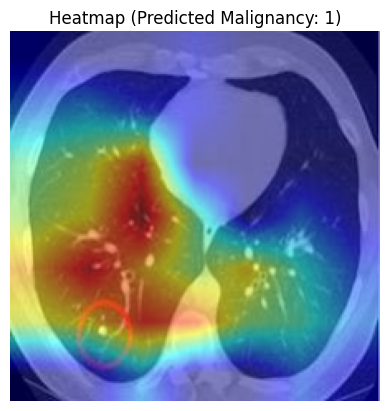

In [25]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from MedViT import MedViT_small
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# Load your model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MedViT_small(num_classes=5).to(device)

# Load your trained weights
state_dict = torch.load("model_weights.pkl", map_location=device)
model.load_state_dict(state_dict, strict=False)
model.eval()

# Define preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3), 
])

# Load and preprocess CT image
image_path = "images/lungs stage1.jpeg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
rgb_img = np.array(image.resize((224, 224))) / 255.0 
input_tensor = transform(image).unsqueeze(0).to(device)

# Inference for malignancy score
with torch.no_grad():
    output = model(input_tensor)
    predicted_class = torch.argmax(output, dim=1).item()
    score = predicted_class + 1  # Convert from 0-indexed to 1-5
    print(f"🧠 Predicted Malignancy Score: {score} / 5")

    # Human-readable interpretation
    if score == 1:
        print("🟢 Class 1: The scan shows no signs of cancer. Everything appears normal. No medical concern at the moment.")
    elif score == 2:
        print("🟢 Class 2: Very low likelihood of cancer. The scan seems mostly normal, but keep regular checkups.")
    elif score == 3:
        print("🟡 Class 3: The findings are unclear. It’s not certain whether the area is cancerous or not. A follow-up with a doctor is advisable.")
    elif score == 4:
        print("🟠 Class 4: There are suspicious signs that could indicate cancer. A detailed examination by a specialist is strongly recommended.")
    elif score == 5:
        print("🔴 Class 5: High risk of cancer detected. This is a serious finding and you should consult a doctor immediately for further evaluation.")
    else:
        print("⚠️ Unknown class — Please verify the model output or input image.")

# Grad-CAM setup
target_layers = [model.norm]  # Adjust based on architecture
cam = GradCAM(model=model, target_layers=target_layers)
grayscale_cam = cam(input_tensor=input_tensor, targets=[ClassifierOutputTarget(predicted_class)])[0]

# Overlay CAM on the original image
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

# Show the result
plt.imshow(visualization)
plt.title(f"Heatmap (Predicted Malignancy: {score})")
plt.axis("off")
plt.show()


In [30]:
target_layer = model.features[-1].conv.conv[0]


In [47]:
print(type(model))
print(model)


<class 'MedViT.MedViT'>
MedViT(
  (stem): Sequential(
    (0): ConvBNReLU(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace=True)
    )
    (1): ConvBNReLU(
      (conv): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace=True)
    )
    (2): ConvBNReLU(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace=True)
    )
    (3): ConvBNReLU(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     